In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout,Flatten

In [2]:
da=pd.read_csv('input.csv',parse_dates=True)
df = pd.read_csv('input.csv',index_col="date",parse_dates=True)
df.fillna(method='ffill',inplace=True)
df.head(2)

,Unnamed: 0,close,high,low,open,NVT
date,,,,,,
2017-03-01,0,17.758,17.758,16.970,16.970,7.576159
2017-03-02,1,19.208,19.246,19.144,19.144,5.164297


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
df_close= df['close'].values
df_close = df_close.reshape(-1, 1) #output:(is a 1 dimensional columnar array)
print(df_close.shape)
df_close[:5]

(2191, 1)


array([[17.758],
       [19.208],
       [19.61 ],
       [18.702],
       [19.2  ]])

In [5]:
train = df['2017-03-01':'2022-05-31']
#train= train.drop('Date', 1)


#print('Test Dataset:',test.shape)
#print (train.head())
test  =df['2022-06-01':'2023-02-28']
#print (test.head())

In [6]:
train_close= train['close'].values
train_close = train_close.reshape(-1, 1)

print(train_close.shape)

train_close[:]

(1918, 1)


array([[  17.758     ],
       [  19.208     ],
       [  19.61      ],
       ...,
       [1810.78967534],
       [1993.23562323],
       [1948.29386521]])

In [7]:
test_close= test['close'].values
test_close = test_close.reshape(-1, 1)

print(test_close.shape)

test_close[:]

(273, 1)


array([[1825.11566758],
       [1834.32861208],
       [1775.87362799],
       [1800.86548828],
       [1805.23571597],
       [1858.95765814],
       [1815.10071858],
       [1793.74118701],
       [1789.79932821],
       [1664.96268624],
       [1529.78234743],
       [1448.11451054],
       [1202.17029721],
       [1212.26917624],
       [1229.72575212],
       [1067.79708906],
       [1087.06080245],
       [ 993.84463989],
       [1126.47502874],
       [1129.76915357],
       [1125.73592841],
       [1052.02641501],
       [1143.26879614],
       [1230.97739875],
       [1242.8201716 ],
       [1201.58443558],
       [1194.04489681],
       [1143.82969586],
       [1097.60597633],
       [1062.92973888],
       [1063.40060571],
       [1066.7203202 ],
       [1074.34560555],
       [1152.94381484],
       [1134.80304743],
       [1188.51384149],
       [1238.82228363],
       [1233.17225334],
       [1216.7005424 ],
       [1168.76108935],
       [1097.71612468],
       [1039.504

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
train_close = scaler.fit_transform(train_close)
train_close[1:]
print(train_close.shape)

(1918, 1)


In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
test_close = scaler.fit_transform(test_close)
test_close[:5]
print(test_close.shape)

(273, 1)


In [10]:
# converting my 1d array into 2 day array with 60 values in each nested list train_open had 1d array.
#now after implementing the function timestamp it is converting into 2 d array . 
#A list within a list containing 60 values

In [11]:
def timestamp(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y
#count_row = df.shape[0]  # gives number of row count
#count_col = df.shape[1]  # gives number of col count

In [12]:
x_train, y_train = timestamp(train_close)
x_train.shape
#x_train[1:]
y_train[1:]



array([0.00664039, 0.0066787 , 0.00670702, ..., 0.37360447, 0.4115948 ,
       0.40223667])

In [13]:
x_test, y_test = timestamp(test_close)
x_test[:1]

array([[0.84135074, 0.8506754 , 0.79151161, 0.81680651, 0.82122973,
        0.87560308, 0.83121435, 0.80959582, 0.80560616, 0.6792558 ,
        0.54243631, 0.45977819, 0.21085174, 0.22107308, 0.23874133,
        0.07484917, 0.09434647, 0.        , 0.13423862, 0.13757269,
        0.13349056, 0.05888727, 0.15123602, 0.24000815, 0.25199452,
        0.21025878, 0.20262782, 0.15180372, 0.10501951, 0.0699228 ,
        0.07039938, 0.07375935, 0.08147709, 0.16102836, 0.14266762,
        0.19702969, 0.24794816, 0.24222962, 0.22555818, 0.17703743,
        0.105131  , 0.04621385, 0.12048647, 0.20004276, 0.24253595,
        0.36468456, 0.35843061, 0.58096837, 0.55419084, 0.54031425]])

In [14]:
# Reshape features for LSTM Layer (3d array for lstm)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_train.shape)
print(x_test.shape)

(1868, 50, 1)
(223, 50, 1)


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [15]:
l_model = Sequential()


l_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
l_model.add(Dropout(0.2))

l_model.add(LSTM(units=50, return_sequences=True))
l_model.add(Dropout(0.2))

l_model.add(LSTM(units=50, return_sequences=True))
l_model.add(Dropout(0.2))

l_model.add(LSTM(units=50))
l_model.add(Dropout(0.2))


l_model.add(Dense(units=1))

l_model.compile(loss='mean_squared_error', optimizer='adam')
history=l_model.fit(x_train, y_train, epochs=10, batch_size=32,validation_split=0.2)

Epoch 1/10


D:\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0098 - val_loss: 0.0087
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0020 - val_loss: 0.0085
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0019 - val_loss: 0.0292
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0011 - val_loss: 0.0074
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0012 - val_loss: 0.0184
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0014 - val_loss: 0.0087
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0012 - val_loss: 0.0094
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0015 - val_loss: 0.0129
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0013 - val_loss: 0.0071
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0012 - val_loss: 0.0076


In [16]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


In [17]:
#running the algo on the x_test and converting the value into the actual price removing the minmax scale
testPredict = l_model.predict(x_test, batch_size=32)
testPredict=scaler.inverse_transform(testPredict)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


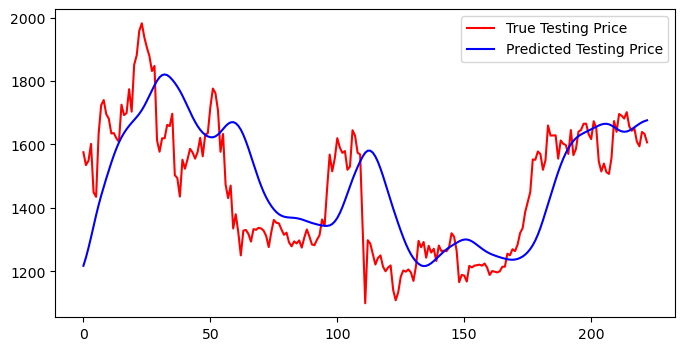

In [18]:
#y_test was previous scaled using minmax so get the actual value it is inversed 
#test_predict is the x_test set which is used after training the train set as the predicting model
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(testPredict, color='blue', label='Predicted Testing Price')
plt.legend()

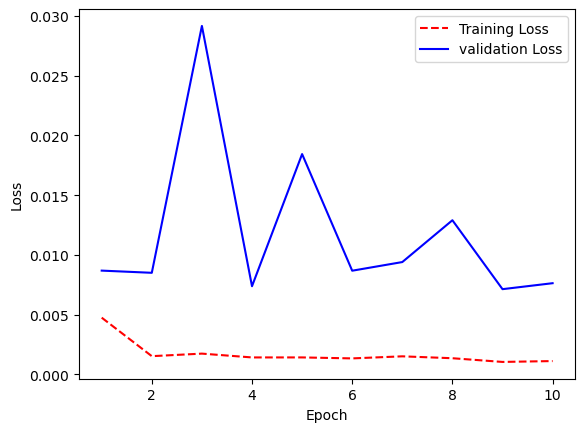

In [19]:
 #Get training and test loss histories
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


# Error Evaluation Metrics :

In [20]:
import math 
score = l_model.evaluate(x_test, y_test, batch_size=32)

MSE = score
RMSE = math.sqrt(score)
print ("value of Mean square error:", MSE)
print("value of Root mean square error:",RMSE)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0313
value of Mean square error: 0.024794770404696465
value of Root mean square error: 0.15746355262312756


In [21]:
from sklearn import metrics
print('R2: ', metrics.r2_score(y_test_scaled, testPredict))

R2:  0.3947963577364827


In [22]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test_scaled, testPredict)

0.40746022285048933